# Sorting Algorithm Exercise

In this exercise I'll implement the most frequently used sorting algorithms and apply a timeit decorator for testing purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from timeit import default_timer as timer

A decorator for timing purpose.

In [2]:
def timed_sort(algo, size = 100):
    def timed(**kwargs):
        test_size = [50*x for x in range(1,size+1)]
        res = test_size[:]
        for i, n in enumerate(test_size):
            sample = list(np.random.randint(1, 10000, n))
            ts = timer()
            sorted_sample = algo(sample, **kwargs)
            if kwargs.get('inplace'):
                sorted_sample = sample
            te = timer()
            if not all([sorted_sample[i]>=sorted_sample[i-1] for i in range(1,len(sorted_sample))]):
                raise ValueError('Not Sorted!')
            res[i] = te - ts
        plt.plot(test_size, res)
        plt.show()
    return timed

#### 1. Insertion Sort

In [3]:
def insertion_sort(x):
    y = []
    for elem in x:
        i = 0
        while i < len(y):
            if y[i] >= elem:
                break
            i += 1
        if i < len(y):
            y = y[:i] + [elem] + y[i:]
        else:
            y.append(elem)
    return y

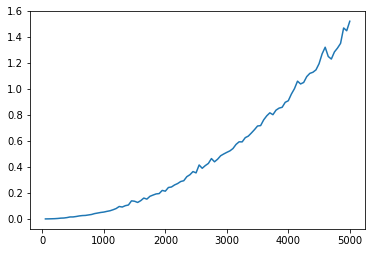

In [4]:
insertion_test = timed_sort(insertion_sort)
insertion_test()

#### 2. Selection Sort

In [5]:
def selection_sort(x, inplace = False):
    if not inplace:
        x = x[:]
    for i in range(len(x)):
        min_idx = i
        for j in range(i+1, len(x)):
            if x[j] < x[min_idx]:
                min_idx = j
        x[min_idx], x[i] = x[i], x[min_idx]
    return x

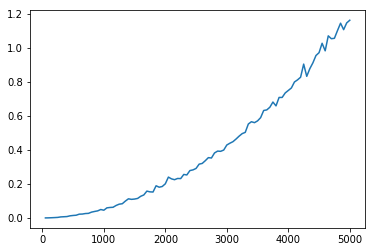

In [6]:
selection_test = timed_sort(selection_sort)
selection_test()

#### 3. Merge Sort

In [7]:
def merge_sort(x):
    if len(x)<= 1:
        return x
    
    mid = len(x) // 2
    left = x[:mid]
    right = x[mid:]
    
    left = merge_sort(left)
    right = merge_sort(right)
    
    new_list = []
    l, r = 0, 0
    if len(left) and len(right):      
        i = 0
        while i < len(x):
            if left[l] < right[r]:
                new_list.append(left[l])
                l += 1
            else:
                new_list.append(right[r])
                r += 1
            i += 1
            if l == len(left) or r == len(right):
                break
    return new_list + left[l:] + right[r:]

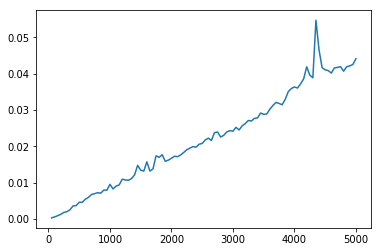

In [8]:
merge_test = timed_sort(merge_sort)
merge_test()

#### 4. Heap Sort

In [9]:
def heapify(x):
    y = [0] + x
    for i in range(1, len(y)):
        parent = i//2
        child = i
        while parent > 0 and y[parent] < y[child]:
            y[parent], y[child] = y[child], y[parent]
            child = parent
            parent = child//2
    return y[1:]
    
def heapify2(x):
    start = len(x)//2 - 1
    while start >= 0:
        shiftDown(x, start, len(x)-1)
        start -= 1
    return x
        
def shiftDown(x, start, end):
    root = start
    while root*2+1 <= end:
        child = root*2+1
        if child+1 <= end and x[child] < x[child+1]:
            child += 1
        if x[root] < x[child]:
            x[root], x[child] = x[child], x[root]
            root = child
        else:
            return

def heap_sort(x, inplace = False):
    if not inplace:
        x = heapify(x)
    else:
        heapify2(x)
    end = len(x)-1
    while end > 0:
        x[0], x[end] = x[end], x[0]
        shiftDown(x, 0, end-1)
        end -= 1
    return x

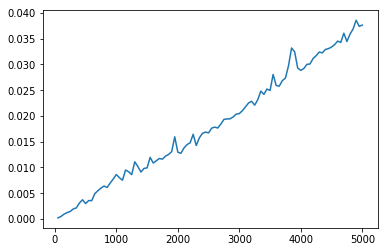

In [10]:
heap_test = timed_sort(heap_sort)
heap_test()

#### 5. Quick Sort

In [11]:
def partition(x, left, right):
    pivot = x[left]
    split = left+1
    for i in range(left+1, right+1):
        if x[i] < pivot:
            x[i], x[split] = x[split], x[i]
            split += 1
    x[left], x[split-1] = x[split-1], x[left]
    return split

def quick_sort_helper(x, left, right):
    if left < right:
        split = partition(x, left, right)
        quick_sort_helper(x, left, split-1)
        quick_sort_helper(x, split, right)
    
def quick_sort(x, inplace = False):
    if not inplace:
        x = x[:]
    quick_sort_helper(x, 0, len(x)-1)
    return x

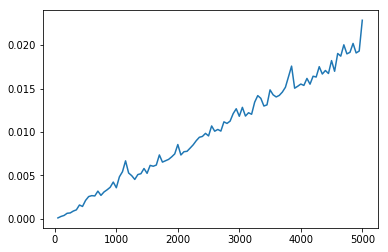

In [12]:
quick_test = timed_sort(quick_sort)
quick_test()

#### 6. Bubble Sort

In [13]:
def bubble_sort(x, inplace = False):
    if not inplace:
        x = x[:]
    for i in range(len(x)):
        for j in range(1, len(x)-i):
            if x[j] < x[j-1]:
                x[j], x[j-1] = x[j-1], x[j]
    return x

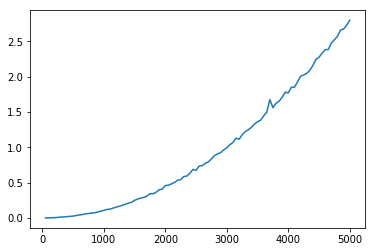

In [14]:
bubble_test = timed_sort(bubble_sort)
bubble_test()